# Determining the Efficiency of a Stirling Engine

In [32]:
# import the necessary packages
import numpy as np
import pandas as pd
from scipy.stats import binned_statistic
from matplotlib import pyplot as plt

## Using the combined data set

Let's first import the data we'll be working with. Pandas can import a .csv file, and we can select rows and columns specifically using slice operators.

In [38]:
# read in the data from a .csv file
data = pd.read_csv('combined-data.csv')
deltaT = data.iloc[:,0]
f = data.iloc[:,1]
fsqrd = f**2

The object below will convert data that we feed it into bins of data. In this case, the temperatures (x-axis) will be binned, and the squared frequencies (y-axis) will be averaged. Standard deviations will also be determined. 

In [68]:
# create a procedure for sorting the data into bins.
def average(x, y, nbins):
    """
    Combine data into bins 
    and calculate statistics
    """
    y_bins, bin_edges, misc = binned_statistic(x, y, statistic = "mean", bins = nbins)
    x_bins = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    y_std, bin_edges, misc = binned_statistic(x, y, statistic = "std", bins = nbins)
    x_std, bin_edges, misc = binned_statistic(x, x, statistic = "std", bins = nbins)
    
    N, bin_edges, misc = binned_statistic(x, y, statistic = "count", bins = nbins)
    
    return x_bins, y_bins, x_std, y_std, N

# nbins controls the number of bins that our data is split into.
nbins = 8
x_bins, y_bins, x_std, y_std, N = average(deltaT, fsqrd, nbins)

# list the bins and average squared frequencies.
print(f"Temperature bins: {x_bins}")
print(f"Average squared frequencies: {y_bins}")

Temperature bins: [31.88206546 34.93497483 37.9878842  41.04079357 44.09370294 47.14661231
 50.19952168 53.25243105]
Average squared frequencies: [1.39575288 2.81342684 4.50582197 5.29504635 6.5380178  8.15966874
 5.96487888 5.97376703]


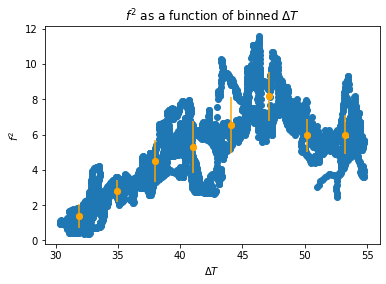

In [51]:
# plot the raw data and the binned data together for a visual inspection

plt.scatter(deltaT, fsqrd)
plt.scatter(x_bins, y_bins)
plt.errorbar(x_bins, y_bins, yerr = y_std, fmt = "o", color = "orange")
plt.title("$f^2$ as a function of binned $\Delta T$")
plt.ylabel("$f^2$")
plt.xlabel("$\Delta T$")
plt.show()

What does a linear regression tell us about this data?

In [99]:
# perform a linear regression using numpy's polyfit()
dataX = x_bins
dataY = y_bins
model = np.polyfit(dataX,dataY,1)
model_fn = np.poly1d(model)

print(model)

[ 0.23399955 -4.87991935]


Using the slope from our linear regression and some knowledge about the Stirling engine parameters, we can estimate the efficiency of the engine. 

In [100]:
# these parameters are from Yeadon's paper, and aren't measured directly from our Stirling engines.

m_wheel = 6.52e-2
r_wheel = 4.35e-2
nMoles = 3.45e-3
gasConstant = 8.31
compression_ratio = 1.3

# calculate the efficiency of the Stirling engine.
efficiency = model[0]*(np.pi**2)*(r_wheel**2)*m_wheel/nMoles/np.log(compression_ratio)/gasConstant
print(efficiency)

0.03788053256248496


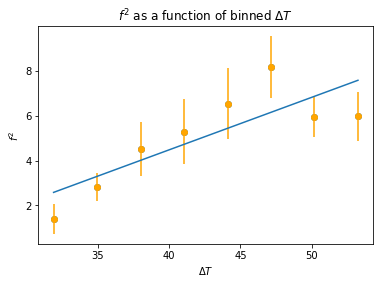

In [101]:
# let's make a final plot of the data + model

plt.scatter(x_bins, y_bins)
plt.plot(dataX, model_fn(dataX))
plt.errorbar(x_bins, y_bins, yerr = y_std, fmt = "o", color = "orange")
plt.title("$f^2$ as a function of binned $\Delta T$")
plt.ylabel("$f^2$")
plt.xlabel("$\Delta T$")
plt.show()